In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./playground-series-s4e9/train.csv')
train.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [3]:
# fuel_type, accident, clean_title -> missing_value 예상

In [4]:
data_checking = pd.DataFrame(train.dtypes, columns = ['type'])
data_checking.reset_index(inplace = True)
data_checking = data_checking.rename(columns = {'index':'column'})
data_checking['Null'] = train.isnull().sum().values
data_checking['Null%'] = data_checking['Null'].apply(lambda x : round((x / train.shape[0])* 100, 3))
data_checking['Unique_value'] = data_checking['column'].apply(lambda x : len(train[x].value_counts()))
data_checking = data_checking.iloc[1:, :]
data_checking

,column,type,Null,Null%,Unique_value
1,brand,object,0,0.000,57
2,model,object,0,0.000,1897
3,model_year,int64,0,0.000,34
4,milage,int64,0,0.000,6651
5,fuel_type,object,5083,2.696,7
6,engine,object,0,0.000,1117
7,transmission,object,0,0.000,52
8,ext_col,object,0,0.000,319
9,int_col,object,0,0.000,156
10,accident,object,2452,1.301,2


In [5]:
def data_info(df):
    data_checking = pd.DataFrame(df.dtypes, columns = ['type'])
    data_checking.reset_index(inplace = True)
    data_checking = data_checking.rename(columns = {'index':'column'})
    data_checking['Null'] = df.isnull().sum().values
    data_checking['Null%'] = data_checking['Null'].apply(lambda x : round((x / df.shape[0])* 100, 3))
    data_checking['Unique_value'] = data_checking['column'].apply(lambda x : len(df[x].value_counts()))
    data_checking = data_checking.iloc[1:, :]
    return data_checking

In [6]:
check_df = data_info(train)
check_df

,column,type,Null,Null%,Unique_value
1,brand,object,0,0.000,57
2,model,object,0,0.000,1897
3,model_year,int64,0,0.000,34
4,milage,int64,0,0.000,6651
5,fuel_type,object,5083,2.696,7
6,engine,object,0,0.000,1117
7,transmission,object,0,0.000,52
8,ext_col,object,0,0.000,319
9,int_col,object,0,0.000,156
10,accident,object,2452,1.301,2


Text(0.5, 1.0, 'Hist of model_year')

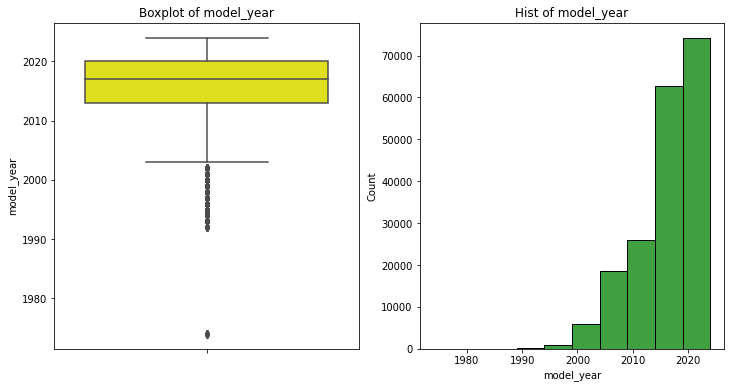

In [14]:
# 수치형은 boxplot, 범주형은 hist
# 수치형 : model_year, milage, price

numeric_df = train.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y = train[numeric_df.columns[1]], color = 'yellow')
plt.title(f'Boxplot of {numeric_df.columns[1]}')

plt.subplot(1, 2, 2)
sns.histplot(train[numeric_df.columns[1]], bins=10, color = 'green')
plt.title(f'Hist of {numeric_df.columns[1]}')

In [13]:
# 수치형은 boxplot, 범주형은 hist
# 수치형 : model_year, milage, price

def plotting_numeric(df):
    numeric_df = df.select_dtypes(include=['number'])

    for i in range(1, len(numeric_df.columns)):
                
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(y = df[numeric_df.columns[i]], color = 'yellow')
        plt.title(f'Boxplot of {numeric_df.columns[i]}')

        plt.subplot(1, 2, 2)
        sns.histplot(df[numeric_df.columns[i]], kde = True, color = 'green')
        plt.title(f'Hist of {numeric_df.columns[i]}')

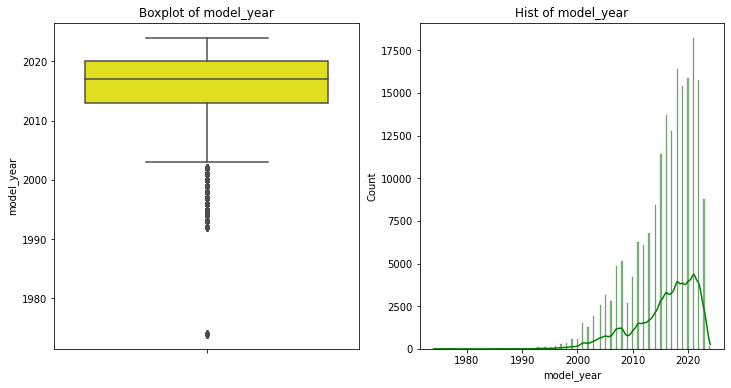

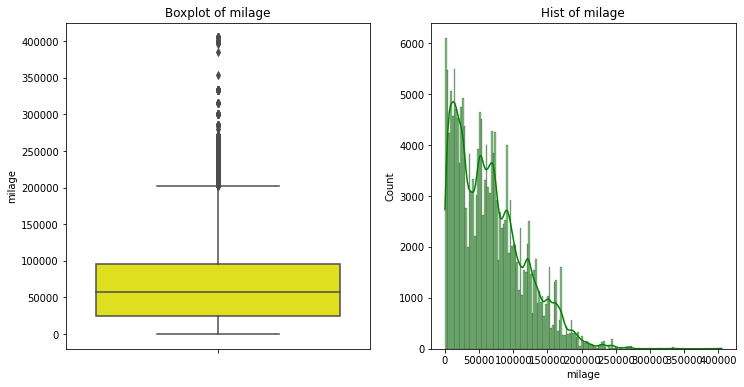

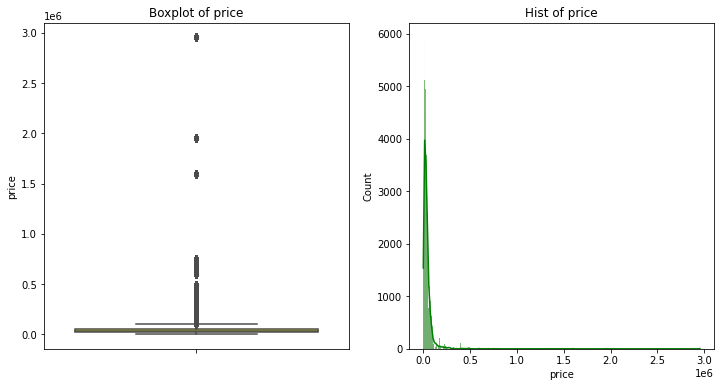

In [8]:
plotting_numeric(train)

Text(0.5, 1.0, 'Hist of log(price)')

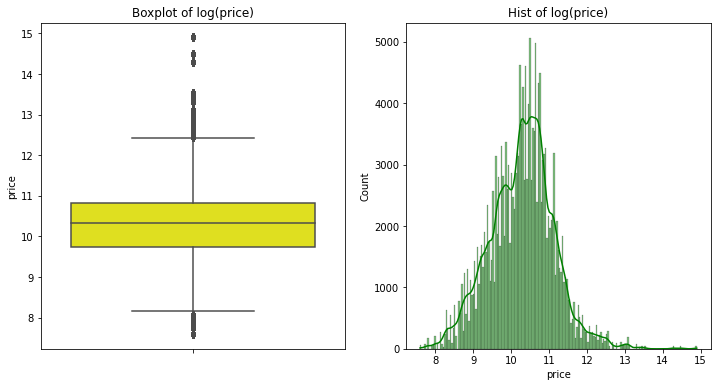

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y = np.log(train['price']), color = 'yellow')
plt.title(f'Boxplot of log(price)')

plt.subplot(1, 2, 2)
sns.histplot(np.log(train['price']), kde = True, color = 'green')
plt.title(f'Hist of log(price)')

In [12]:
for col in train.columns:
    print(len(set(train[col])))

188533
57
1897
34
6651
8
1117
52
319
156
3
2
1569


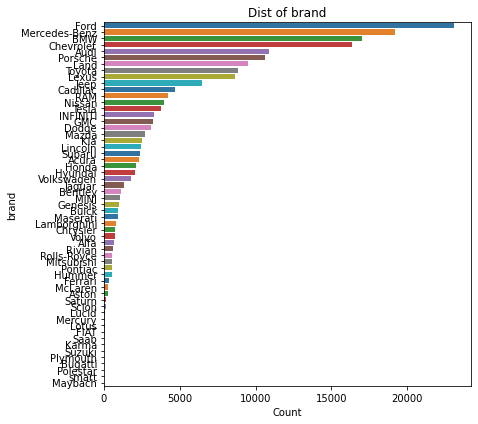

In [17]:
categorical_df = train.select_dtypes(include=['object'])
categorical_df.columns

if len(set(train[categorical_df.columns[0]])) < 100:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(y = train[categorical_df.columns[0]], palette='tab10', order = train[categorical_df.columns[0]].value_counts().index)
    plt.title(f'Dist of {categorical_df.columns[0]}')
    plt.xlabel('Count')
    plt.ylabel(f'{categorical_df.columns[0]}')
    plt.tight_layout()
    plt.show()

In [23]:
def plotting_categorical(df):
    categorical_df = df.select_dtypes(include=['object'])

    for i in range(len(categorical_df.columns)):

        if len(set(df[categorical_df.columns[i]])) < 100:
            
            plt.figure(figsize=(12, 8))
            sns.countplot(y = df[categorical_df.columns[i]], palette='tab10', order = df[categorical_df.columns[i]].value_counts().index)
            plt.title(f'Dist of {categorical_df.columns[i]}')
            plt.xlabel('Count')
            plt.ylabel(f'{categorical_df.columns[i]}')
            plt.tight_layout()
            plt.show()

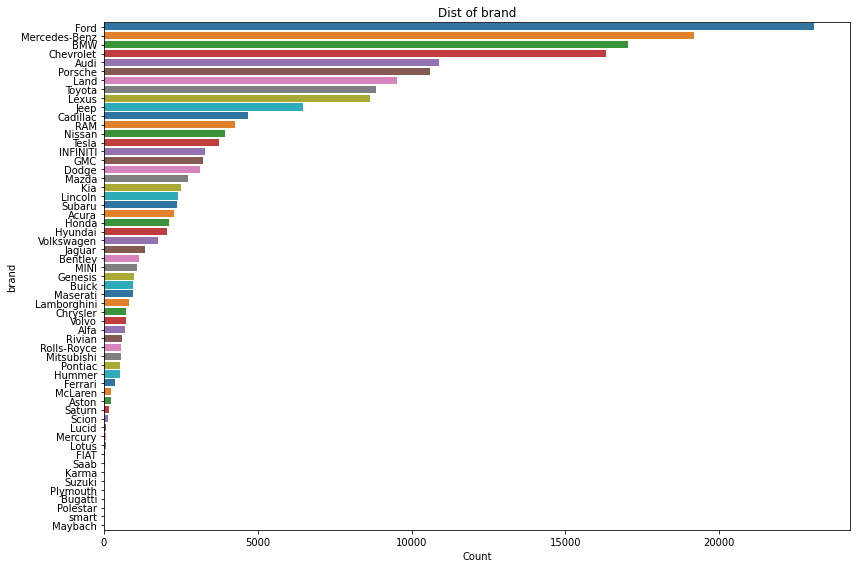

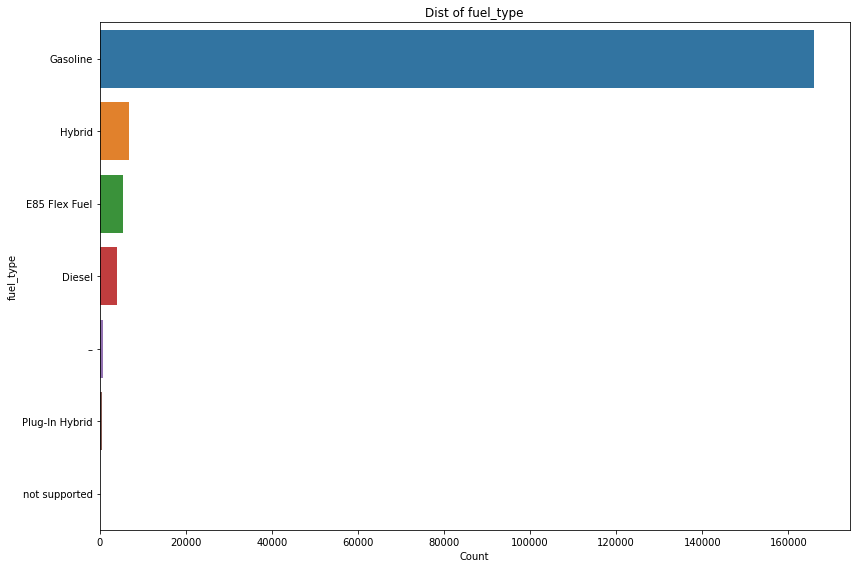

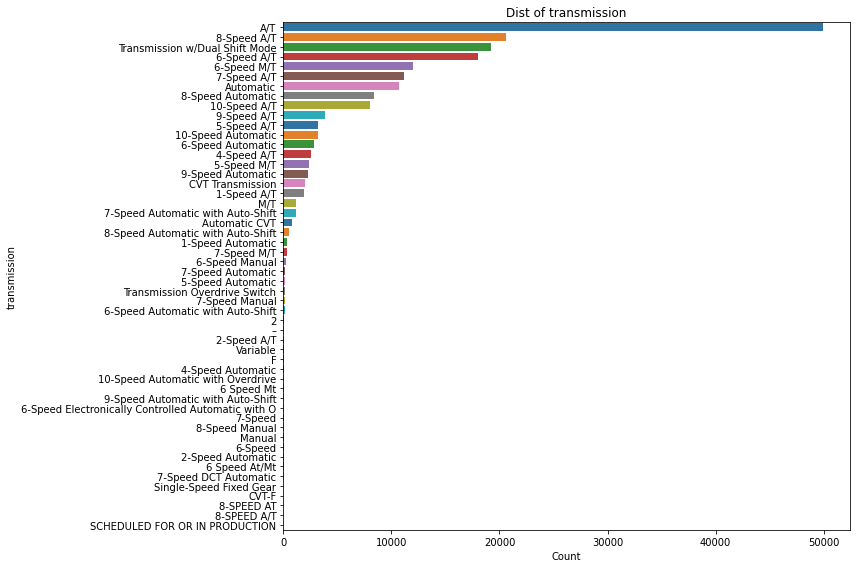

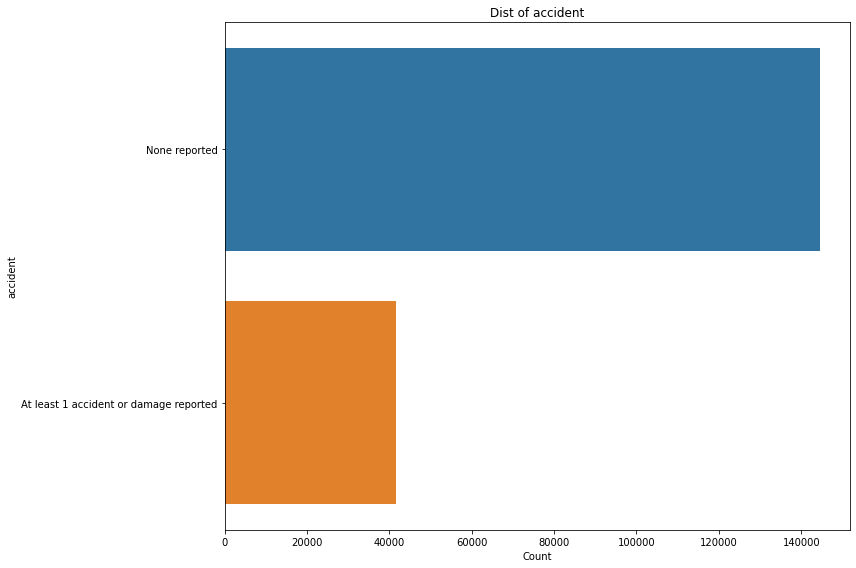

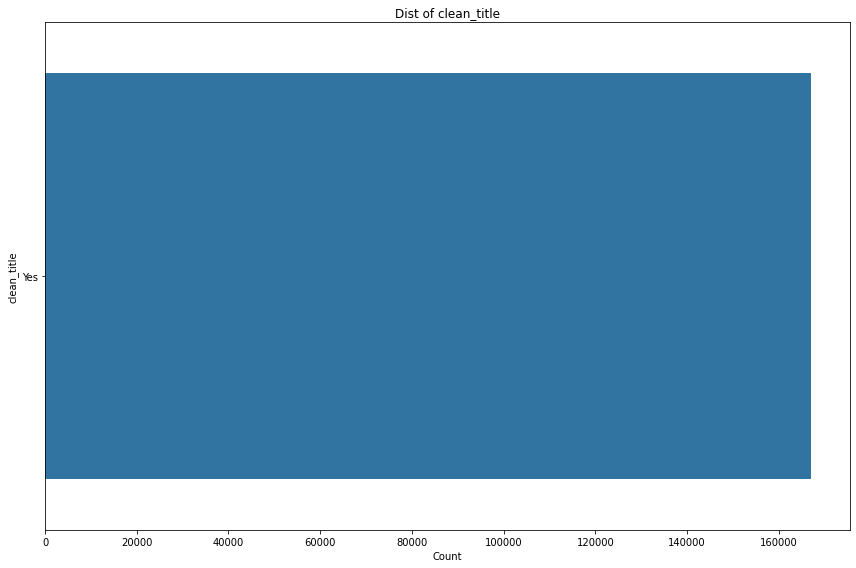

In [24]:
plotting_categorical(train)

In [25]:
check_df

,column,type,Null,Null%,Unique_value
1,brand,object,0,0.000,57
2,model,object,0,0.000,1897
3,model_year,int64,0,0.000,34
4,milage,int64,0,0.000,6651
5,fuel_type,object,5083,2.696,7
6,engine,object,0,0.000,1117
7,transmission,object,0,0.000,52
8,ext_col,object,0,0.000,319
9,int_col,object,0,0.000,156
10,accident,object,2452,1.301,2


In [31]:
# 188533
print(train['fuel_type'].value_counts())
print('==================')
print('"Sum of value count"', train['fuel_type'].value_counts().sum())

print()
print(train['accident'].value_counts())
print('==================')
print('"Sum of value count"', train['accident'].value_counts().sum())

print()
print(train['clean_title'].value_counts())
print('==================')
print('"Sum of value count"', train['clean_title'].value_counts().sum())

Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: fuel_type, dtype: int64
"Sum of value count" 183450

None reported                             144514
At least 1 accident or damage reported     41567
Name: accident, dtype: int64
"Sum of value count" 186081

Yes    167114
Name: clean_title, dtype: int64
"Sum of value count" 167114
